# Exploratory Data Analysis (EDA):

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('/content/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


as we see there are no null tuples present in the data and there are only numerical columns present in the data

now we will visualize the data in histogram ,heatmap and boxplot  

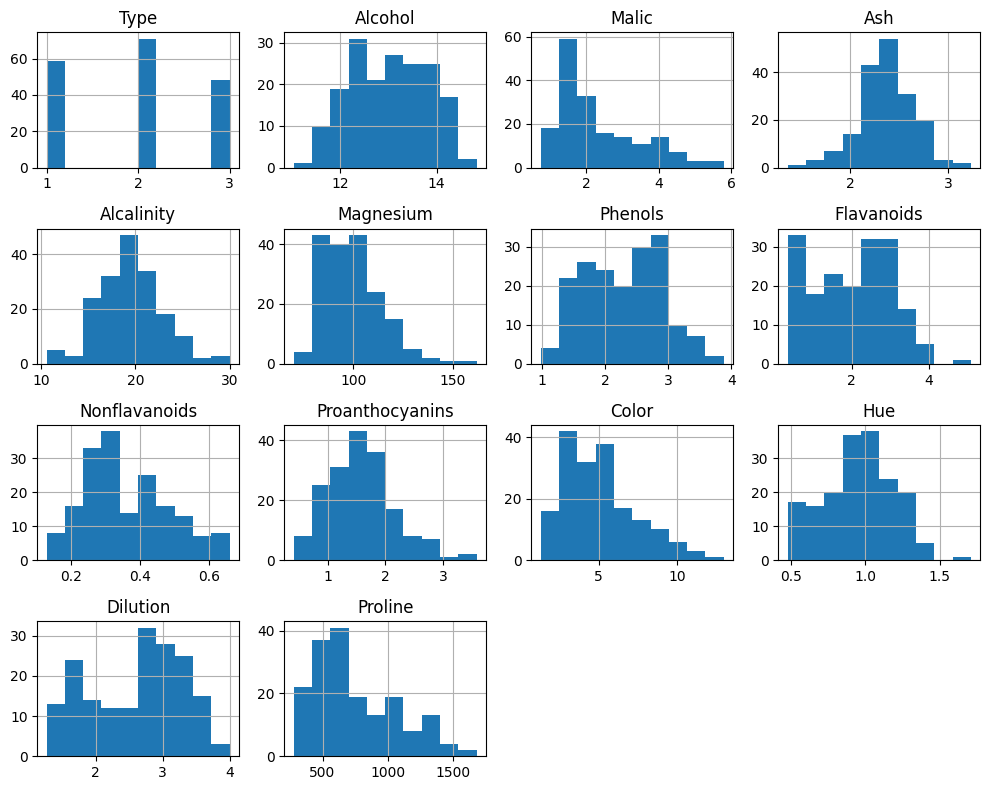

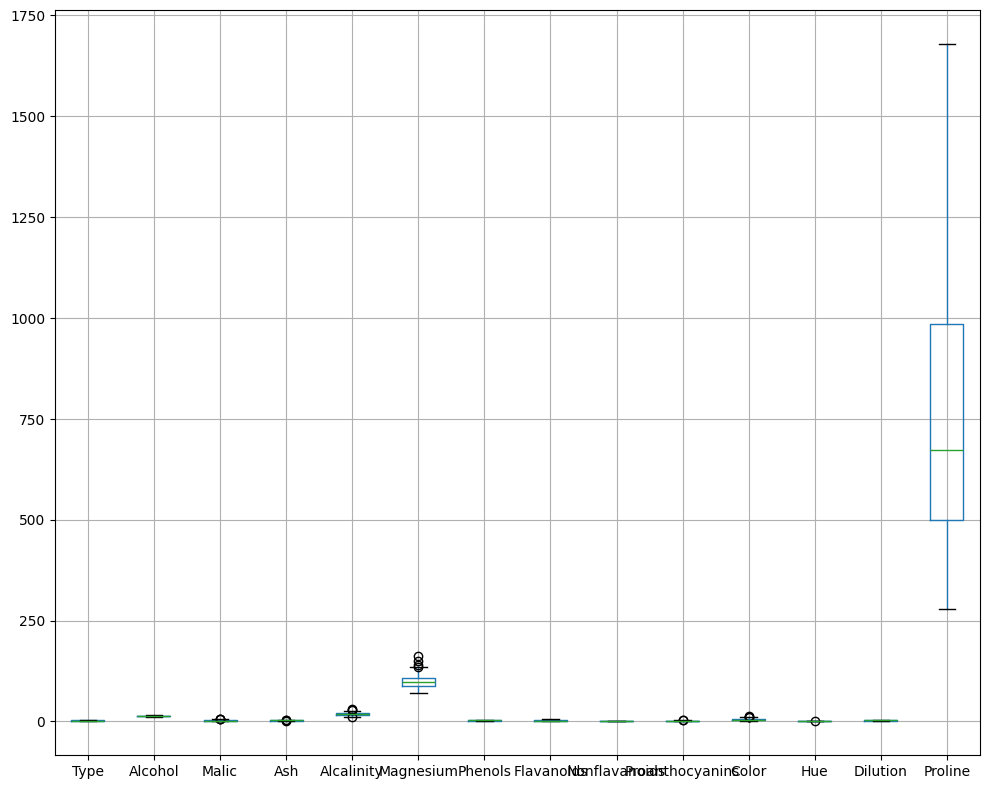

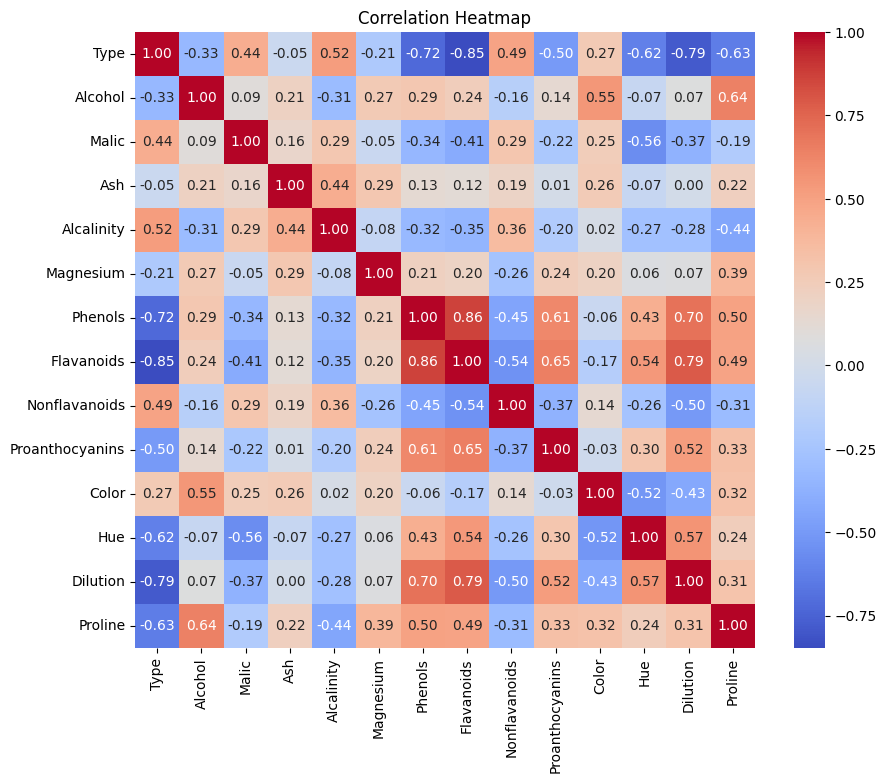

In [78]:
# prompt: hist boxplot heatmap

# Plot histograms for all columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Create box plots for all columns
df.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

as we see there are outliers present in the data from histo gram few columns are in skewed and in box plot we clearly notice them and we can see strong relationships between variables which leads to - Dimensional Redundancy and etc so To mitigate this, techniques like Principal Component Analysis (PCA) can be used to reduce redundancy before clustering.


as we are going to perform cluster algorithmn we remove outliers because the are sensitive to k_mean cluster

In [79]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             161 non-null    int64  
 1   Alcohol          161 non-null    float64
 2   Malic            161 non-null    float64
 3   Ash              161 non-null    float64
 4   Alcalinity       161 non-null    float64
 5   Magnesium        161 non-null    int64  
 6   Phenols          161 non-null    float64
 7   Flavanoids       161 non-null    float64
 8   Nonflavanoids    161 non-null    float64
 9   Proanthocyanins  161 non-null    float64
 10  Color            161 non-null    float64
 11  Hue              161 non-null    float64
 12  Dilution         161 non-null    float64
 13  Proline          161 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 18.9 KB


we are using standardscalar function to scale all the features where they contribute equally

In [80]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the dataframe
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame (optional, but useful for further analysis)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the head of the scaled dataframe
print(df_scaled.head())


       Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0 -1.151955  1.495711 -0.571130  0.277425   -1.208619   2.309259  0.808420   
1 -1.151955  0.200698 -0.504145 -0.928625   -2.672685   0.118914  0.570475   
2 -1.151955  0.150407  0.050878  1.275535   -0.210392   0.200038  0.808420   
3 -1.151955  1.671732 -0.341465  0.568540   -0.809329   1.173525  2.474030   
4 -1.151955  0.250990  0.270973  2.107293    0.588189   1.579144  0.808420   

   Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0    1.034224      -0.643463         1.415284  0.296494  0.372149  1.826678   
1    0.728906      -0.808165        -0.511374 -0.300438  0.418153  1.091015   
2    1.217414      -0.478761         2.407227  0.315445  0.326144  0.765626   
3    1.471845      -0.972867         1.205450  1.319806 -0.455928  1.161752   
4    0.657665       0.262398         0.518720 -0.328863  0.372149  0.426090   

    Proline  
0  0.947436  
1  0.900976  
2  1.319115  


In [81]:
with_out_pca_cluster = df_scaled


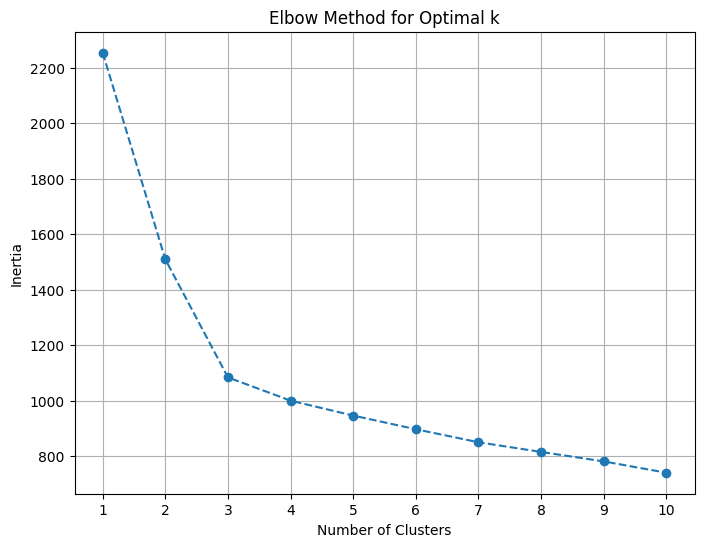

In [82]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(with_out_pca_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [83]:
# Based on the elbow method, let's assume the optimal number of clusters is 3 (or another value based on the plot)
optimal_k = 3

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(with_out_pca_cluster)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# You can now analyze the clusters. For example, view the first few rows with cluster labels:
print(df.head())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        1  
1           0.26             1.28   4.38  1.05      3.40     1050        1  
2           0.30             2.81   5.68  1.03      3.17     1185        1  
3           0.24             2.18   7.80  0.86      3.45     1480        1  
4           0.39             1.82   4.32  1.04      2.93      735        1  


In [84]:
from sklearn.metrics import silhouette_score
print(silhouette_score(with_out_pca_cluster, kmeans.labels_))

0.32242091220438224


now we will use pca and do cluster pca helps us to reduce the dimensionality of data while preserving its important patterns.

In [85]:
with_pca_cluster = df_scaled

In [86]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=2) # You can choose the number of components

# Fit and transform the scaled data
principal_components = pca.fit_transform(with_pca_cluster)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

# Display the head of the PCA dataframe
print(pca_df.head())

   principal_component_1  principal_component_2
0               3.651576               1.522429
1               2.552097              -0.362780
2               2.852966               0.870372
3               4.044034               2.628303
4               1.379702               1.005934


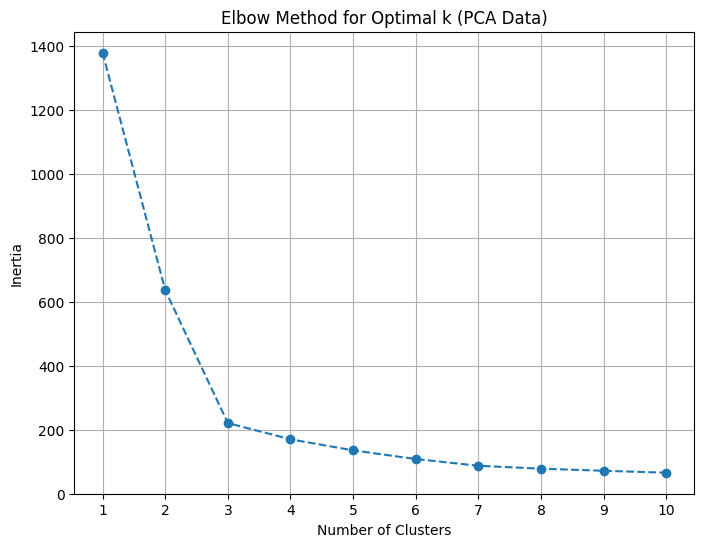

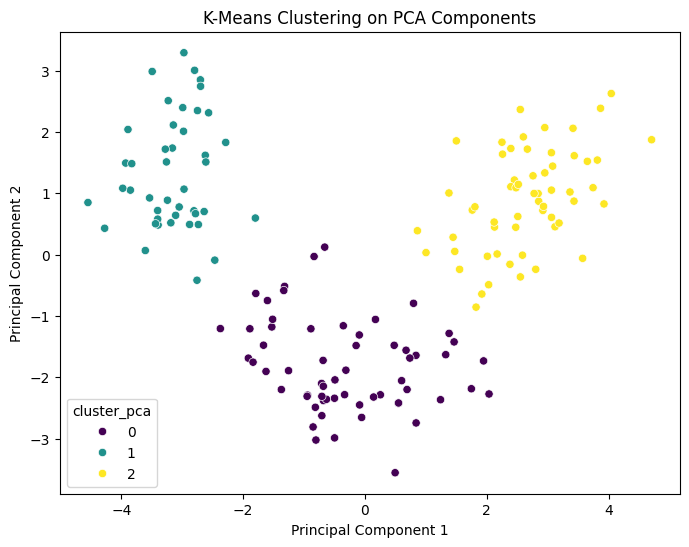

0.6103943921346902


In [87]:
# Determine the optimal number of clusters using the elbow method on the PCA data
inertia_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_pca.fit(pca_df)
    inertia_pca.append(kmeans_pca.inertia_)

# Plot the elbow method graph for PCA data
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_pca, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow method on PCA data, let's assume the optimal number of clusters is 3
optimal_k_pca = 3

# Apply K-Means clustering with the optimal number of clusters on the PCA data
kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
kmeans_pca.fit(pca_df)

# Add the cluster labels to the PCA dataframe
pca_df['cluster_pca'] = kmeans_pca.labels_

# Visualize the clusters in the PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster_pca', data=pca_df, palette='viridis')
plt.title('K-Means Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(silhouette_score(pca_df[['principal_component_1', 'principal_component_2']], kmeans_pca.labels_))

as we compare the silhouette_score of before pca and after pca for clustering there is clear difference before it was 0.3 after it was 0.6 which explains resonable model

so what i conclude is that using pca is a good option to make a good cluster we have to use pcal when variables are highlu corelated or the silhouette_score is not going above 5 after using many methods